# Fuzzy Control system design step by step


a fuzzy control system is usually trained to keep a variable cloes to a specefic value. to do so the system needs to know two things, a) the error (deviation from the ideal value) and b) the way the error is changing. 

In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

## Step1. Set up the Fuzzy Control System

In [25]:
#an array between -2 and +2 wiht 5 values
uni = np.linspace(0, 15, 15)

#three fuzzy variables(two inputs: the error(caugh) and deviation from the error(fever), one output (cold))
caugh = ctrl.Antecedent(uni, 'caugh')
fever= ctrl.Antecedent(uni, 'fever')
cold = ctrl.Consequent(uni, 'cold')

# using the 'automf' function generate our fuzzy membership variables with terms. 
# terms names are specefied using kwarg 'names='
names = ['high', 'low', 'mid']
caugh.automf(names=names)
fever.automf(names=names)
cold.automf(names=names)

## Step2. rule defination

In [26]:
rule1 = ctrl.Rule(caugh['high'] & fever['high'], cold['high'], label='rule high')
rule2 = ctrl.Rule(caugh['low'] & fever['low'], cold['low'], label='rule low')
rule3 = ctrl.Rule(caugh['low'] & fever['high'] | caugh['high'] & fever['low'], cold['mid'], label='rule mid')

In [27]:
# print the rule 1
rule1.view

<bound method Rule.view of IF caugh[high] AND fever[high] THEN cold[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax>

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

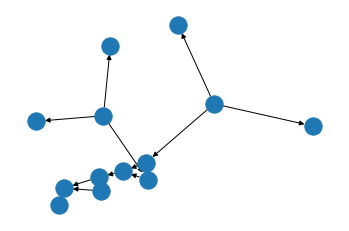

In [28]:
# view the rule 1
rule1.view()

### step3. add the rules to the control system

In [37]:
controlSys = ctrl.ControlSystem(rules=[rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(controlSys)

### step4. test the simularions with values for the variables 

In [41]:
sim.input['caugh'] = 9
sim.input['fever'] = 12
sim.compute()
print(sim.output['cold'])

7.499999999999999


/usr/local/Cellar/jupyterlab/3.0.14/libexec/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


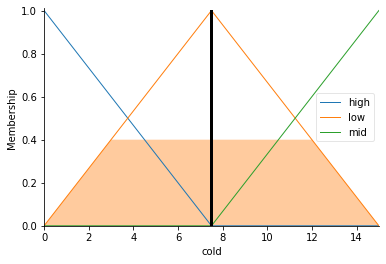

In [40]:
# vsiualize the outcome value in the already defined spectrum 
cold.view(sim=sim)